In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import requests
import plotly.express as px
import html

















In [2]:
data_emissions = pd.read_html("https://en.wikipedia.org/wiki/List_of_countries_by_carbon_dioxide_emissions")
df = data_emissions[1] 
df.columns = ['country', 'co2_1990', 'co2_2005', 'co2_2017', 'world_percent_17', 'emmision_change_1990vs2017', 'per_land_area_2017', 'per_capita_2017', 'total_inc_lucf_2018', 'total_exc_lucf_2018']
df = df[df["country"].str.contains("World|European Union") == False] 
df.head(5)

,country,co2_1990,co2_2005,co2_2017,world_percent_17,emmision_change_1990vs2017,per_land_area_2017,per_capita_2017,total_inc_lucf_2018,total_exc_lucf_2018
3,Afghanistan,2.546,1.063,11.422,0.03%,348.6%,18.0,0.3,7.59,7.44
4,Albania,6.583,4.196,5.026,0.01%,-23.7%,175.0,1.7,5.32,5.56
5,Algeria,65.677,98.197,159.929,0.43%,143.5%,67.0,3.9,151.87,151.67
6,Angola,5.851,15.975,30.876,0.08%,427.7%,25.0,1.0,62.93,27.34
7,Anguilla,0.006,0.014,0.028,0.00%,366.7%,308.0,1.9,NaN,NaN


In [3]:
countries = df.nlargest(5, columns =["co2_1990","co2_2005", "co2_2017"])
countries = countries.sort_values(by=["co2_2017"])
countries.head(5)

,country,co2_1990,co2_2005,co2_2017,world_percent_17,emmision_change_1990vs2017,per_land_area_2017,per_capita_2017,total_inc_lucf_2018,total_exc_lucf_2018
77,Germany,1018.097,837.284,796.529,2.15%,-21.8%,2230.0,9.7,680.06,709.54
102,Japan,1149.400,1276.863,1320.776,3.56%,14.9%,3494.0,10.4,1074.08,1106.15
158,Russia,2378.921,1733.950,1764.866,4.76%,-25.8%,103.0,12.3,1049.05,1607.55
202,United States,5085.897,5971.571,5107.393,13.77%,0.4%,519.0,15.7,4749.57,4981.30
42,China,2397.048,6263.064,10877.218,29.34%,353.8%,1133.0,7.7,9663.36,10313.46


<Figure size 432x288 with 0 Axes>

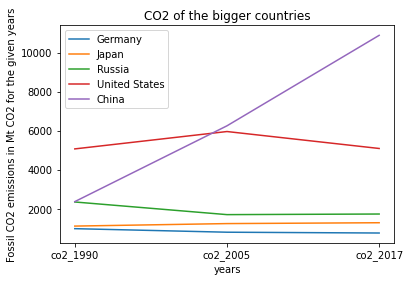

In [4]:
fig = plt.figure()
fig, ax = plt.subplots()

years = countries.columns[1:4]

for index, row in countries.iterrows():
   plt.plot(years, row[1:4], label = row[0])

plt.title("CO2 of the bigger countries")
plt.xlabel("years")
plt.ylabel("Fossil CO2 emissions in Mt CO2 for the given years")
ax.legend()

